<a href="https://colab.research.google.com/github/whataLIN/sample_rp/blob/main/%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 반려견 ---- ----

In [ ]:
#@title 라이브러리 및 모듈 불러오기
# 분석 기본 라이브러리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#@title 한글 폰트 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,704 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [ ]:
#@title 한글 폰트를 나눔폰트로 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
cd drive/My Drive/팀1

[Errno 2] No such file or directory: 'drive/My Drive/팀1'
/content/drive/My Drive/팀1


In [ ]:
#@title 파일 불러오기

# 서울시 동물병원 파일 불러오기
seoul_pet_hospital = pd.read_csv('data/서울시_동물병원.csv', encoding = 'cp949')
# 서울시 애견미용업장 파일 불러오기
seoul_pet_beauty = pd.read_excel('data/서울시 애견미용업장.xls')
# 서울시 애견위탁관리 파일 불러오기
seoul_pet_consignment = pd.read_csv('data/동물위탁관리업.csv')
# 서울시 주요 공원 현황 파일 불러오기
seoul_park = pd.read_csv('data/서울시 주요 공원현황.csv', encoding = 'cp949')
# 반려동물 유무 비율 보유 파일 불러오기
seoul_pet_own = pd.read_csv('data/반려동물+유무+및+취득+경로_20230314161547.csv')


# 데이터 출처 : 

# 서울시 동물병원

In [ ]:
#@title 서울시 동물병원 파일 불러오기

seoul_pet_hospital

sph = seoul_pet_hospital.copy()
sph = sph.dropna(how='all')

sph

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),업무구분명,상세업무구분명,권리주체일련번호,총직원수
4537,4538.0,동물병원,02_03_01_P,5120000.0,5.120000e+17,1995-06-01,NaN,1.0,영업/정상,BBBB,...,2004-01-26 17:25,I,2018-08-31 23:59,NaN,NaN,NaN,동물병원,NaN,0,NaN
4591,4592.0,동물병원,02_03_01_P,3620000.0,3.620000e+17,2012-05-11,NaN,1.0,영업/정상,0,...,2012-05-11 17:00,I,2018-08-31 23:59,NaN,190562.9092,189333.0171,동물병원,NaN,0,NaN
4592,4593.0,동물병원,02_03_01_P,3620000.0,3.620000e+17,2015-01-23,NaN,1.0,영업/정상,0,...,2019-04-23 9:21,U,2019-04-25 2:40,NaN,191120.4200,184715.8661,동물병원,NaN,0,NaN
4593,4594.0,동물병원,02_03_01_P,3620000.0,3.620000e+17,2015-05-18,NaN,1.0,영업/정상,0,...,2021-05-18 11:33,U,2021-05-20 2:40,NaN,188403.3482,189881.7854,동물병원,NaN,0,NaN
4594,4595.0,동물병원,02_03_01_P,3620000.0,3.620000e+17,2015-05-26,NaN,1.0,영업/정상,0,...,2021-01-14 11:09,U,2021-01-16 2:40,NaN,192235.3200,187547.2500,동물병원,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,9630.0,동물병원,02_03_01_P,3990000.0,3.990000e+17,2022-05-19,NaN,1.0,영업/정상,0,...,2022-09-19 17:47,U,2022-09-21 2:40,NaN,218023.8985,466105.9958,동물병원,NaN,0,0.0
9630,9631.0,동물병원,02_03_01_P,3640000.0,3.640000e+17,2022-05-19,NaN,1.0,영업/정상,0,...,2022-05-19 18:11,I,2022-05-21 0:22,NaN,238808.7508,317465.3316,동물병원,NaN,0,0.0
9631,9632.0,동물병원,02_03_01_P,3340000.0,3.340000e+17,2022-05-19,NaN,1.0,영업/정상,0,...,2022-12-30 16:16,U,2023-01-01 2:40,NaN,379594.3462,177529.7771,동물병원,NaN,0,0.0
9632,9633.0,동물병원,02_03_01_P,3560000.0,3.560000e+17,2022-05-23,NaN,1.0,영업/정상,0,...,2022-05-23 11:28,I,2022-05-25 0:22,NaN,NaN,NaN,동물병원,NaN,0,0.0


In [ ]:
sph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 4537 to 9633
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   번호        5044 non-null   float64
 1   개방서비스명    5044 non-null   object 
 2   개방서비스아이디  5044 non-null   object 
 3   개방자치단체코드  5044 non-null   float64
 4   관리번호      5044 non-null   float64
 5   인허가일자     5044 non-null   object 
 6   인허가취소일자   0 non-null      float64
 7   영업상태구분코드  5044 non-null   float64
 8   영업상태명     5044 non-null   object 
 9   상세영업상태코드  5044 non-null   object 
 10  상세영업상태명   5043 non-null   object 
 11  폐업일자      0 non-null      float64
 12  휴업시작일자    9 non-null      object 
 13  휴업종료일자    10 non-null     object 
 14  재개업일자     2 non-null      object 
 15  소재지전화     3933 non-null   object 
 16  소재지면적     4675 non-null   float64
 17  소재지우편번호   0 non-null      float64
 18  소재지전체주소   4974 non-null   object 
 19  도로명전체주소   5017 non-null   object 
 20  도로명우편번호   4692 non-null   o

In [ ]:
sph.describe()

,번호,개방자치단체코드,관리번호,인허가취소일자,영업상태구분코드,폐업일자,소재지면적,소재지우편번호,업태구분명,좌표정보(x),좌표정보(y),상세업무구분명,총직원수
count,5044.000000,5.044000e+03,5.044000e+03,0.0,5044.0,0.0,4675.000000,0.0,0.0,4952.000000,4952.000000,0.0,1836.0
mean,7112.489492,4.173698e+06,4.208773e+17,NaN,1.0,NaN,112.249326,NaN,NaN,242504.789540,342940.716188,NaN,0.0
std,1456.240098,8.813407e+05,9.081313e+16,NaN,0.0,NaN,526.181641,NaN,NaN,74557.572573,119777.719585,NaN,0.0
min,4538.000000,3.000000e+06,3.000000e+17,NaN,1.0,NaN,0.000000,NaN,NaN,-521.893266,-30484.016350,NaN,0.0
25%,5851.750000,3.450000e+06,3.450000e+17,NaN,1.0,NaN,0.000000,NaN,NaN,191057.064900,248443.149750,NaN,0.0
50%,7112.500000,3.955000e+06,3.955000e+17,NaN,1.0,NaN,40.000000,NaN,NaN,209406.940250,388988.151950,NaN,0.0
75%,8373.250000,4.860000e+06,4.980000e+17,NaN,1.0,NaN,101.030000,NaN,NaN,299429.850275,445063.258650,NaN,0.0
max,9634.000000,6.520000e+06,6.520000e+17,NaN,1.0,NaN,15120.000000,NaN,NaN,545061.103900,542974.824100,NaN,0.0


In [ ]:
#@title 필요없는 컬럼들 제거
cols1 = ["총직원수", "인허가일자", "인허가취소일자","상세영업상태코드","최종수정시점","데이터갱신구분","업태구분명","데이터갱신일자", "상세업무구분명", "개방자치단체코드","관리번호","영업상태구분코드","폐업일자",
         "휴업시작일자","소재지면적","소재지우편번호", "상세영업상태명","휴업종료일자", "재개업일자","개방서비스아이디","권리주체일련번호","업무구분명"]

for col in cols1:
    del sph[col]

sph

,번호,개방서비스명,영업상태명,소재지전화,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,좌표정보(x),좌표정보(y)
4537,4538.0,동물병원,영업/정상,NaN,경상북도 문경시 문경읍 하리,NaN,NaN,문경가축병원,NaN,NaN
4591,4592.0,동물병원,영업/정상,571-9114,광주광역시 북구 일곡동 843-5번지,광주광역시 북구 양일로305번길 8 (일곡동),61040,일곡동물병원,190562.9092,189333.0171
4592,4593.0,동물병원,영업/정상,NaN,광주광역시 북구 임동 5-16번지,광주광역시 북구 태봉로 37-6 (임동),61244,우리동물병원,191120.4200,184715.8661
4593,4594.0,동물병원,영업/정상,062-574-7975,광주광역시 북구 양산동 254-123,"광주광역시 북구 하서로 371, 1층 (양산동)",61074,참좋은 동물병원,188403.3482,189881.7854
4594,4595.0,동물병원,영업/정상,224-7582,광주광역시 북구 오치동 1028-27,광주광역시 북구 서하로 319-1 (오치동),61124,김앤강 동물병원,192235.3200,187547.2500
...,...,...,...,...,...,...,...,...,...,...
9629,9630.0,동물병원,영업/정상,031-571-4009,경기도 남양주시 오남읍 양지리 94-1 선일프라자,"경기도 남양주시 오남읍 진건오남로 778, 선일프라자 205호",12036,하이 동물병원,218023.8985,466105.9958
9630,9631.0,동물병원,영업/정상,NaN,대전광역시 동구 용전동 43-1,"대전광역시 동구 계족로 510, 3층 (용전동)",34542,케어동물병원,238808.7508,317465.3316
9631,9632.0,동물병원,영업/정상,051-265-0114,부산광역시 사하구 장림동 325-67,"부산광역시 사하구 장림번영로 41, 1층 (장림동)",49475,모아동물병원,379594.3462,177529.7771
9632,9633.0,동물병원,영업/정상,032-569-6677,인천광역시 서구 원당동 0,"인천광역시 서구 발산로 41, 4층 (원당동)",22866,24시 더원 동물병원,NaN,NaN


In [ ]:
#@title '소재지전체주소' 컬럼에서 '서울'을 포함한 데이터만 필터링
sph = sph[sph['소재지전체주소'].str.contains('서울', na=False)]

sph

,번호,개방서비스명,영업상태명,소재지전화,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,좌표정보(x),좌표정보(y)
4612,4613.0,동물병원,영업/정상,02-831-0075,서울특별시 영등포구 신길동 324-49 영민빌딩 1층,"서울특별시 영등포구 가마산로 449-1, 영민빌딩 1층 (신길동)",7383,다움동물병원,191647.1628,444844.7641
4680,4681.0,동물병원,영업/정상,2237-3366,서울특별시 중구 신당동 336-3 명덕빌딩,"서울특별시 중구 다산로 175, 명덕빌딩 (신당동)",4608,바우미우동물병원,201064.9637,450779.7210
4681,4682.0,동물병원,영업/정상,2278-0075,서울특별시 중구 묵정동 32-1,서울특별시 중구 퇴계로 254-1 (묵정동),4619,황동물병원,199930.8583,451121.3448
4682,4683.0,동물병원,영업/정상,928-5599,서울특별시 성북구 보문동2가 49번지,서울특별시 성북구 보문로 137 (보문동2가),2871,서울종합동물병원,201537.5976,453866.5570
4683,4684.0,동물병원,영업/정상,918-3344,서울특별시 성북구 장위동 8-2 석계역 한일노벨리아시티 210호,"서울특별시 성북구 화랑로 299, 2층 210호 (장위동, 석계역 한일노벨리아시티)",2779,대학동물병원,205326.1448,456806.4324
...,...,...,...,...,...,...,...,...,...,...
9618,9619.0,동물병원,영업/정상,NaN,서울특별시 관악구 봉천동 300-17 관악구재향군인회,"서울특별시 관악구 낙성대로 32, 관악구재향군인회 301호 (봉천동)",8790,닥터펫보리 특수클리닉,196283.1075,441498.7696
9620,9621.0,동물병원,영업/정상,907-7512,서울특별시 도봉구 쌍문동 262-10 104호,"서울특별시 도봉구 시루봉로 59, 104호 (쌍문동)",1375,사랑해요동물병원,202376.4525,461534.6798
9622,9623.0,동물병원,영업/정상,02-6956-5259,서울특별시 송파구 오금동 1 홍일빌딩,"서울특별시 송파구 양재대로 1164, 홍일빌딩 2층 (오금동)",5652,엘리트 동물의료센터,211282.3087,445435.9019
9623,9624.0,동물병원,영업/정상,02-797-4408,서울특별시 강남구 역삼동 827-67,"서울특별시 강남구 테헤란로8길 46, 2층 (역삼동)",6240,동물치과병원메이,202780.1268,443740.0451


In [ ]:
import re

sph_list = ["강서구",
            "양천구",
            "구로구",
            "금천구",
            "영등포구",
            "동작구",
            "관악구",
            "서초구",
            "강남구",
            "송파구",
            "강동구",
            "마포구",
            "은평구",
            "서대문구",
            "종로구",
            "중구",
            "용산구",
            "성북구",
            "성동구",
            "강서구",
            "광진구",
            "중랑구",
            "노원구",
            "도봉구",
            "강북구"
]

pattern = '|'.join(sph_list)
sph['소재지전체주소'] = sph['소재지전체주소'].str.extract(f'({pattern})', flags=re.IGNORECASE)

sph

<ipython-input-69-4939d58a7d08>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sph['소재지전체주소'] = sph['소재지전체주소'].str.extract(f'({pattern})', flags=re.IGNORECASE)


,번호,개방서비스명,영업상태명,소재지전화,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,좌표정보(x),좌표정보(y)
4612,4613.0,동물병원,영업/정상,02-831-0075,영등포구,"서울특별시 영등포구 가마산로 449-1, 영민빌딩 1층 (신길동)",7383,다움동물병원,191647.1628,444844.7641
4680,4681.0,동물병원,영업/정상,2237-3366,중구,"서울특별시 중구 다산로 175, 명덕빌딩 (신당동)",4608,바우미우동물병원,201064.9637,450779.7210
4681,4682.0,동물병원,영업/정상,2278-0075,중구,서울특별시 중구 퇴계로 254-1 (묵정동),4619,황동물병원,199930.8583,451121.3448
4682,4683.0,동물병원,영업/정상,928-5599,성북구,서울특별시 성북구 보문로 137 (보문동2가),2871,서울종합동물병원,201537.5976,453866.5570
4683,4684.0,동물병원,영업/정상,918-3344,성북구,"서울특별시 성북구 화랑로 299, 2층 210호 (장위동, 석계역 한일노벨리아시티)",2779,대학동물병원,205326.1448,456806.4324
...,...,...,...,...,...,...,...,...,...,...
9618,9619.0,동물병원,영업/정상,NaN,관악구,"서울특별시 관악구 낙성대로 32, 관악구재향군인회 301호 (봉천동)",8790,닥터펫보리 특수클리닉,196283.1075,441498.7696
9620,9621.0,동물병원,영업/정상,907-7512,도봉구,"서울특별시 도봉구 시루봉로 59, 104호 (쌍문동)",1375,사랑해요동물병원,202376.4525,461534.6798
9622,9623.0,동물병원,영업/정상,02-6956-5259,송파구,"서울특별시 송파구 양재대로 1164, 홍일빌딩 2층 (오금동)",5652,엘리트 동물의료센터,211282.3087,445435.9019
9623,9624.0,동물병원,영업/정상,02-797-4408,강남구,"서울특별시 강남구 테헤란로8길 46, 2층 (역삼동)",6240,동물치과병원메이,202780.1268,443740.0451


In [ ]:
sph_gu=(sph.groupby(sph['소재지전체주소']).count())[["사업장명"]]
sph_gu

sph_sort = sph_gu.sort_values(by=['사업장명'], ascending=False)
sph_sort

,사업장명
소재지전체주소,
강남구,86
송파구,71
서초구,51
강서구,48
양천구,47
마포구,47
노원구,44
은평구,43
강동구,40


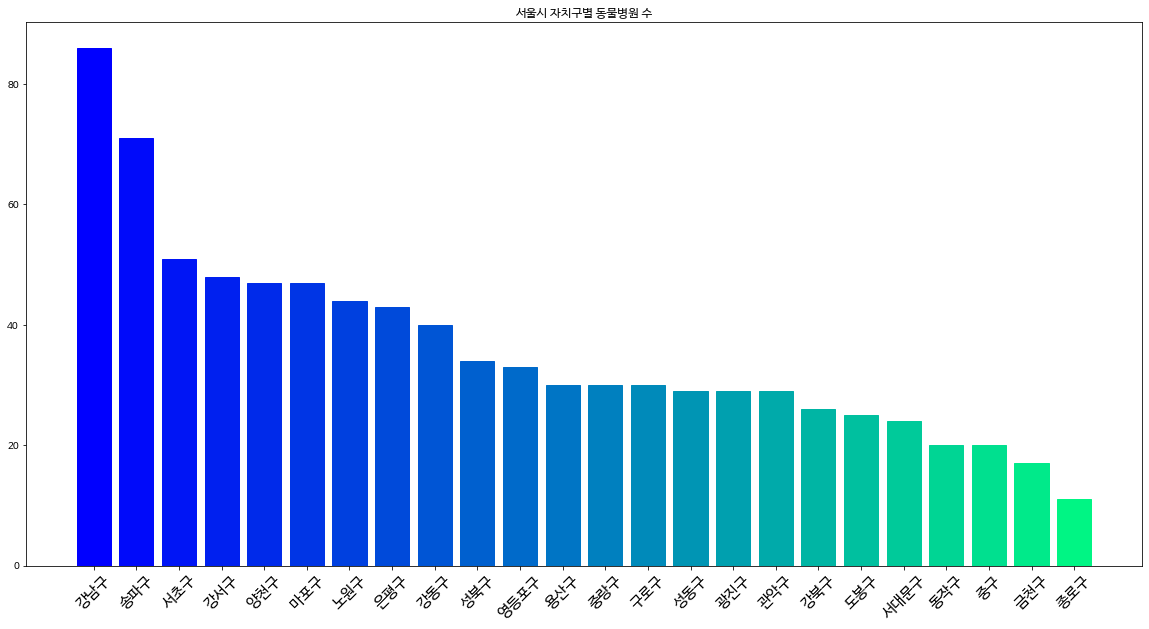

In [ ]:
# 그라데이션 색상을 위한 컬러 맵 생성
cmap = plt.get_cmap('winter')

# 데이터프레임에서 값을 가져와서 바차트를 그립니다.
fig, ax = plt.subplots(figsize = (20, 10))
bars = ax.bar(sph_sort.index, sph_sort['사업장명'], align='center')

# 그라데이션 색상 적용
for i, bar in enumerate(bars):
    bar.set_color(cmap(i / len(sph_sort.index)))

# x축 레이블 설정
plt.xticks(rotation = 45, fontsize = 15)

# 그래프 타이틀 설정
plt.title('서울시 자치구별 동물병원 수')

# 그래프 출력
plt.show()

# 서울시 애견미용업장

In [ ]:
#@title 서울시 애견미용업장 파일 불러오기
# 번호, 구분, 업체명, 소재지
seoul_pet_beauty

,번호,구분,업체명,소재지,인허가 정보,이전인허가정보
0,1,미용,펫힐링센터,서울특별시 종로구 부암동,300000004920230001,NaN
1,2,미용,올리브동물병원,서울특별시 종로구 홍지동,300000004920220001,NaN
2,3,미용,"사계절, 몽",서울특별시 종로구 숭인동,300000004920210002,3.000000e+17
3,4,미용,허그댕댕,서울특별시 종로구 창신동,300000004920210001,3.000000e+17
4,5,미용,한국반려동물아카데미뷰티샵,서울특별시 종로구 숭인동,300000004920190006,3.000000e+17
...,...,...,...,...,...,...
1467,1468,미용,펫클럽,서울특별시 강동구 명일동,324000004920180009,3.240000e+17
1468,1469,미용,다래 동물병원,서울특별시 강동구 천호동,324000004920180008,3.240000e+17
1469,1470,미용,비주독아카데미앤샵,서울특별시 강동구 성내동,324000004920180010,3.240000e+17
1470,1471,미용,사랑이있는동물병원,서울특별시 강동구 명일동,324000004920180007,3.240000e+17


In [ ]:
#@title 서울시 애견 미용업장 파일 복사
spb = seoul_pet_beauty.copy()
spb

,번호,구분,업체명,소재지,인허가 정보,이전인허가정보
0,1,미용,펫힐링센터,서울특별시 종로구 부암동,300000004920230001,NaN
1,2,미용,올리브동물병원,서울특별시 종로구 홍지동,300000004920220001,NaN
2,3,미용,"사계절, 몽",서울특별시 종로구 숭인동,300000004920210002,3.000000e+17
3,4,미용,허그댕댕,서울특별시 종로구 창신동,300000004920210001,3.000000e+17
4,5,미용,한국반려동물아카데미뷰티샵,서울특별시 종로구 숭인동,300000004920190006,3.000000e+17
...,...,...,...,...,...,...
1467,1468,미용,펫클럽,서울특별시 강동구 명일동,324000004920180009,3.240000e+17
1468,1469,미용,다래 동물병원,서울특별시 강동구 천호동,324000004920180008,3.240000e+17
1469,1470,미용,비주독아카데미앤샵,서울특별시 강동구 성내동,324000004920180010,3.240000e+17
1470,1471,미용,사랑이있는동물병원,서울특별시 강동구 명일동,324000004920180007,3.240000e+17


In [ ]:
# 인허가 정보 컬럼들 제거
cols1 = ["번호", "인허가 정보", "이전인허가정보"]

for col in cols1:
    del spb[col]

In [ ]:
import re

pattern = '|'.join(sph_list)

spb['소재지'] = spb['소재지'].str.extract(f'({pattern})', flags=re.IGNORECASE)
spb

,구분,업체명,소재지
0,미용,펫힐링센터,종로구
1,미용,올리브동물병원,종로구
2,미용,"사계절, 몽",종로구
3,미용,허그댕댕,종로구
4,미용,한국반려동물아카데미뷰티샵,종로구
...,...,...,...
1467,미용,펫클럽,강동구
1468,미용,다래 동물병원,강동구
1469,미용,비주독아카데미앤샵,강동구
1470,미용,사랑이있는동물병원,강동구


In [ ]:
spb2 = spb.groupby(spb["소재지"]).count()[["업체명"]]
spb2


spb_sort = spb2.sort_values(by=['업체명'], ascending=False)
spb_sort

,업체명
소재지,
강남구,137
송파구,118
강서구,86
은평구,84
강동구,79
노원구,76
서초구,72
성북구,63
양천구,62


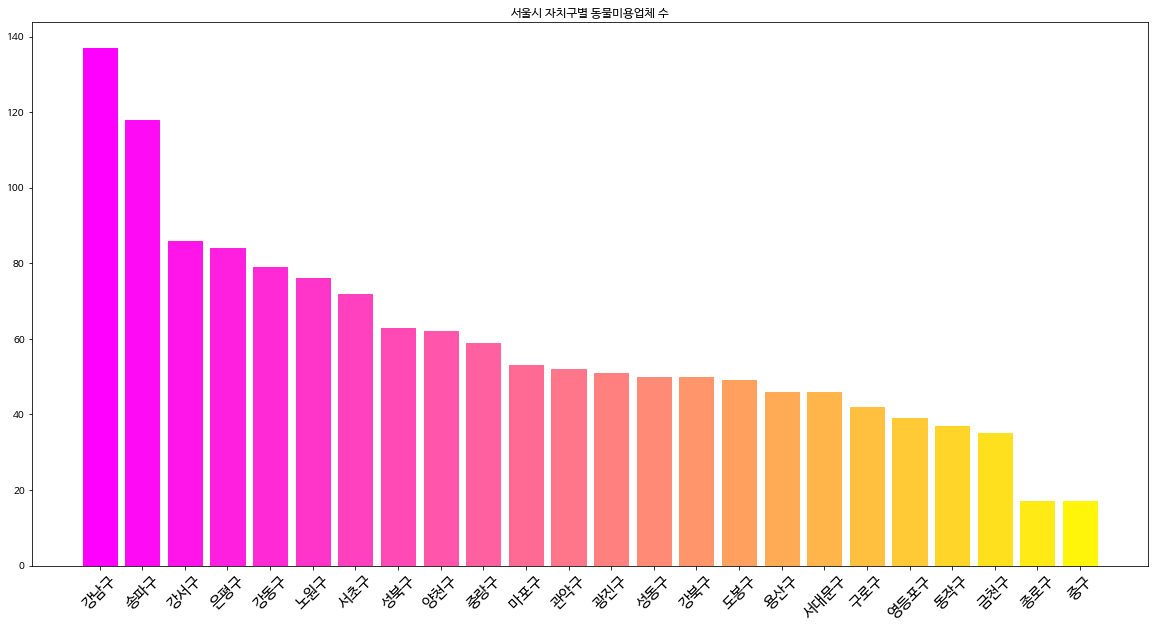

In [ ]:
# 그라데이션 색상을 위한 컬러 맵 생성
cmap = plt.get_cmap('spring')

# 데이터프레임에서 값을 가져와서 바차트를 그립니다.
fig, ax = plt.subplots(figsize = (20, 10))
bars = ax.bar(spb_sort.index, spb_sort['업체명'], align='center')

# 그라데이션 색상 적용
for i, bar in enumerate(bars):
    bar.set_color(cmap(i / len(spb_sort.index)))

# x축 레이블 설정
plt.xticks(rotation = 45, fontsize = 15)

# 그래프 타이틀 설정
plt.title('서울시 자치구별 동물미용업체 수')

# 그래프 출력
plt.show()

# 서울시 애견 위탁관리

In [ ]:
# 서울시 애견위탁관리 파일 불러오기
# 번호, 구분(위탁관리 포함된 문자만), 업체명, 소재지

df = pd.read_csv("data/동물위탁관리업.csv")
df

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),업무구분명,상세업무구분명,권리주체일련번호,총직원수
0,14,동물위탁관리업,02_03_10_P,3080000,3.080000e+17,2023-02-15,NaN,1,영업/정상,0,...,2023-02-15 14:19,I,2023-02-17 0:41,NaN,203447.4397,458322.9975,동물위탁관리업,동물위탁관리업,0,0
1,17,동물위탁관리업,02_03_10_P,3060000,3.060000e+17,2023-02-15,NaN,1,영업/정상,0,...,2023-02-15 9:31,I,2023-02-17 0:41,NaN,208264.1339,455115.8219,동물위탁관리업,동물위탁관리업,0,0
2,18,동물위탁관리업,02_03_10_P,3220000,3.220000e+17,2023-02-06,NaN,1,영업/정상,0,...,2023-02-06 9:04,I,2023-02-08 0:40,NaN,204425.2135,441411.7876,동물위탁관리업,동물위탁관리업,0,0
3,21,동물위탁관리업,02_03_10_P,3130000,3.130000e+17,2023-02-23,NaN,1,영업/정상,0,...,2023-02-23 10:03,I,2023-02-25 0:41,NaN,191154.2644,450740.7244,동물위탁관리업,동물위탁관리업,0,0
4,39,동물위탁관리업,02_03_10_P,3090000,3.090000e+17,2023-02-17,NaN,1,영업/정상,0,...,2023-02-17 11:03,I,2023-02-19 0:41,NaN,202165.6284,460889.9406,동물위탁관리업,동물위탁관리업,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,5062,동물위탁관리업,02_03_10_P,3050000,3.050000e+17,2020-03-26,NaN,1,영업/정상,0,...,2022-04-28 18:10,I,2022-07-02 17:34,NaN,204313.8695,452538.1419,동물위탁관리업,동물위탁관리업,0,0
699,5063,동물위탁관리업,02_03_10_P,3050000,3.050000e+17,2020-05-11,NaN,1,영업/정상,0,...,2022-04-28 18:10,I,2022-07-02 17:34,NaN,203823.0185,453587.7078,동물위탁관리업,동물위탁관리업,0,0
700,5064,동물위탁관리업,02_03_10_P,3050000,3.050000e+17,2020-07-19,NaN,1,영업/정상,0,...,2022-04-28 18:10,I,2022-07-02 17:34,NaN,205692.5781,451736.5423,동물위탁관리업,동물위탁관리업,0,0
701,5065,동물위탁관리업,02_03_10_P,3050000,3.050000e+17,2021-01-21,NaN,1,영업/정상,0,...,2023-01-12 9:40,U,2023-01-14 2:40,NaN,206465.0137,452586.8261,동물위탁관리업,동물위탁관리업,0,0


In [ ]:
df2 = df.groupby([df["개방서비스명"],df["소재지전체주소"]])
df2
df3 = df2[["소재지전체주소"]].count().rename(columns={"소재지전체주소": "개수"})
df3

개수
개방서비스명  소재지전체주소       
동물위탁관리업 경기도 안산시 단원   1
        서울특별시 강남    94
        서울특별시 강동    34
        서울특별시 강북    20
        서울특별시 강서    57
        서울특별시 관악    33
        서울특별시 광진    23
        서울특별시 구로     9
        서울특별시 금천    18
        서울특별시 노원    26
        서울특별시 도봉    16
        서울특별시 동대문   27
        서울특별시 동작    13
        서울특별시 마포    18
        서울특별시 서대문   16
        서울특별시 서초    43
        서울특별시 성동    25
        서울특별시 성북    20
        서울특별시 송파    60
        서울특별시 양천    33
        서울특별시 영등포   20
        서울특별시 용산    27
        서울특별시 은평    25
        서울특별시 종로     6
        서울특별시 중      7
        서울특별시 중랑    32

In [ ]:
dict1 = df3.iloc[1:].loc[:,'개수'].reset_index(level=0, drop=True).to_dict()
dict1

{'서울특별시 강남': 94,
 '서울특별시 강동': 34,
 '서울특별시 강북': 20,
 '서울특별시 강서': 57,
 '서울특별시 관악': 33,
 '서울특별시 광진': 23,
 '서울특별시 구로': 9,
 '서울특별시 금천': 18,
 '서울특별시 노원': 26,
 '서울특별시 도봉': 16,
 '서울특별시 동대문': 27,
 '서울특별시 동작': 13,
 '서울특별시 마포': 18,
 '서울특별시 서대문': 16,
 '서울특별시 서초': 43,
 '서울특별시 성동': 25,
 '서울특별시 성북': 20,
 '서울특별시 송파': 60,
 '서울특별시 양천': 33,
 '서울특별시 영등포': 20,
 '서울특별시 용산': 27,
 '서울특별시 은평': 25,
 '서울특별시 종로': 6,
 '서울특별시 중': 7,
 '서울특별시 중랑': 32}

In [ ]:
import copy

dict2 = copy.deepcopy(dict1)
dict2

{'서울특별시 강남': 94,
 '서울특별시 강동': 34,
 '서울특별시 강북': 20,
 '서울특별시 강서': 57,
 '서울특별시 관악': 33,
 '서울특별시 광진': 23,
 '서울특별시 구로': 9,
 '서울특별시 금천': 18,
 '서울특별시 노원': 26,
 '서울특별시 도봉': 16,
 '서울특별시 동대문': 27,
 '서울특별시 동작': 13,
 '서울특별시 마포': 18,
 '서울특별시 서대문': 16,
 '서울특별시 서초': 43,
 '서울특별시 성동': 25,
 '서울특별시 성북': 20,
 '서울특별시 송파': 60,
 '서울특별시 양천': 33,
 '서울특별시 영등포': 20,
 '서울특별시 용산': 27,
 '서울특별시 은평': 25,
 '서울특별시 종로': 6,
 '서울특별시 중': 7,
 '서울특별시 중랑': 32}

In [ ]:
dict2_keys_list = list(dict2.keys())
print(dict2_keys_list)

['서울특별시 강남', '서울특별시 강동', '서울특별시 강북', '서울특별시 강서', '서울특별시 관악', '서울특별시 광진', '서울특별시 구로', '서울특별시 금천', '서울특별시 노원', '서울특별시 도봉', '서울특별시 동대문', '서울특별시 동작', '서울특별시 마포', '서울특별시 서대문', '서울특별시 서초', '서울특별시 성동', '서울특별시 성북', '서울특별시 송파', '서울특별시 양천', '서울특별시 영등포', '서울특별시 용산', '서울특별시 은평', '서울특별시 종로', '서울특별시 중', '서울특별시 중랑']


In [ ]:
dict2_values_list = list(dict2.values())
print(dict2_values_list)

[94, 34, 20, 57, 33, 23, 9, 18, 26, 16, 27, 13, 18, 16, 43, 25, 20, 60, 33, 20, 27, 25, 6, 7, 32]


In [ ]:
dict2_keys_list2 = [x + "구" for x in dict2_keys_list]
dict2_keys_list2

['서울특별시 강남구',
 '서울특별시 강동구',
 '서울특별시 강북구',
 '서울특별시 강서구',
 '서울특별시 관악구',
 '서울특별시 광진구',
 '서울특별시 구로구',
 '서울특별시 금천구',
 '서울특별시 노원구',
 '서울특별시 도봉구',
 '서울특별시 동대문구',
 '서울특별시 동작구',
 '서울특별시 마포구',
 '서울특별시 서대문구',
 '서울특별시 서초구',
 '서울특별시 성동구',
 '서울특별시 성북구',
 '서울특별시 송파구',
 '서울특별시 양천구',
 '서울특별시 영등포구',
 '서울특별시 용산구',
 '서울특별시 은평구',
 '서울특별시 종로구',
 '서울특별시 중구',
 '서울특별시 중랑구']

In [ ]:
dict2_keys_list3 = [x.replace("서울특별시", "") for x in dict2_keys_list2]
dict2_keys_list3

[' 강남구',
 ' 강동구',
 ' 강북구',
 ' 강서구',
 ' 관악구',
 ' 광진구',
 ' 구로구',
 ' 금천구',
 ' 노원구',
 ' 도봉구',
 ' 동대문구',
 ' 동작구',
 ' 마포구',
 ' 서대문구',
 ' 서초구',
 ' 성동구',
 ' 성북구',
 ' 송파구',
 ' 양천구',
 ' 영등포구',
 ' 용산구',
 ' 은평구',
 ' 종로구',
 ' 중구',
 ' 중랑구']

In [ ]:
done_dict = dict(zip(dict2_keys_list3, dict2_values_list))
print(done_dict)

{' 강남구': 94, ' 강동구': 34, ' 강북구': 20, ' 강서구': 57, ' 관악구': 33, ' 광진구': 23, ' 구로구': 9, ' 금천구': 18, ' 노원구': 26, ' 도봉구': 16, ' 동대문구': 27, ' 동작구': 13, ' 마포구': 18, ' 서대문구': 16, ' 서초구': 43, ' 성동구': 25, ' 성북구': 20, ' 송파구': 60, ' 양천구': 33, ' 영등포구': 20, ' 용산구': 27, ' 은평구': 25, ' 종로구': 6, ' 중구': 7, ' 중랑구': 32}


In [ ]:
done_dict
sorted_items = sorted(done_dict.items(), key=lambda x: x[1], reverse=True)
sorted_done_dict = dict(sorted_items)
print(sorted_done_dict)

{' 강남구': 94, ' 송파구': 60, ' 강서구': 57, ' 서초구': 43, ' 강동구': 34, ' 관악구': 33, ' 양천구': 33, ' 중랑구': 32, ' 동대문구': 27, ' 용산구': 27, ' 노원구': 26, ' 성동구': 25, ' 은평구': 25, ' 광진구': 23, ' 강북구': 20, ' 성북구': 20, ' 영등포구': 20, ' 금천구': 18, ' 마포구': 18, ' 도봉구': 16, ' 서대문구': 16, ' 동작구': 13, ' 구로구': 9, ' 중구': 7, ' 종로구': 6}


In [ ]:
df_gu = pd.DataFrame(sorted_dict2.items(), columns=['gu', 'data'])
df_gu['data'] = df_gu['data'].astype('float')
df_gu.sort_values('data', inplace=True, ascending=False)

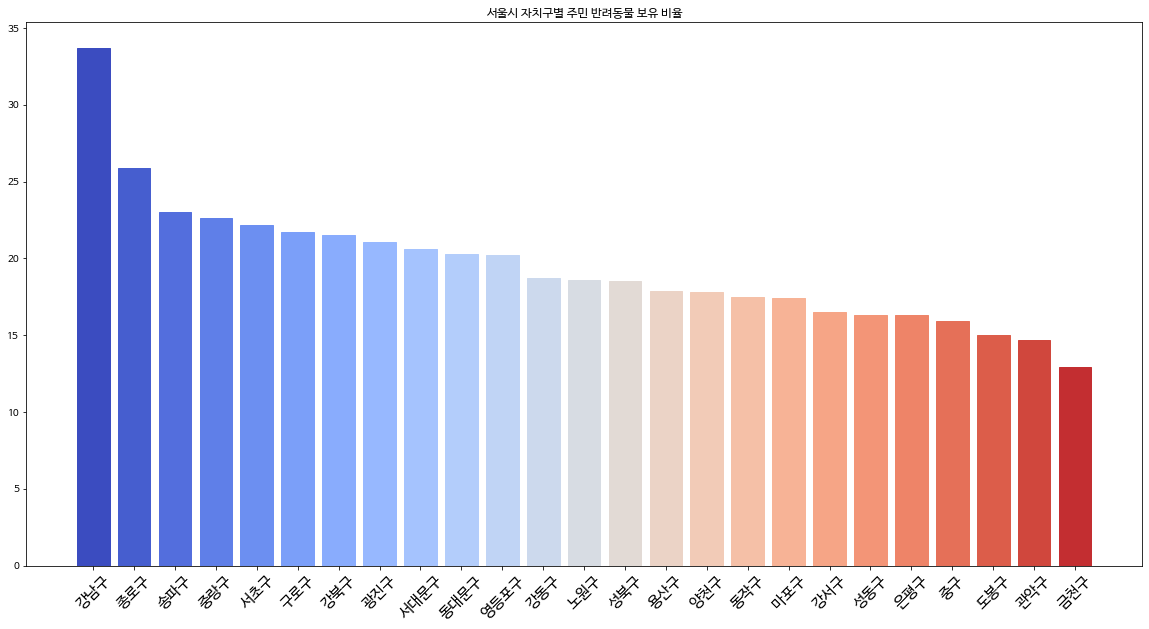

In [ ]:
# 그라데이션 색상을 위한 컬러 맵 생성
cmap = plt.get_cmap('coolwarm')
# 데이터프레임에서 값을 가져와서 바차트를 그립니다.
fig, ax = plt.subplots(figsize = (20, 10))
# bars = ax.bar(list(sorted_dict2.keys())[::-1], list(sorted_dict2.values())[::-1], align='center')
bars = ax.bar(df_gu.gu, df_gu.data, align='center')
# 그라데이션 색상 적용
for i, bar in enumerate(bars):
    bar.set_color(cmap(i / len(list(sorted_dict2.keys()))))
# x축 레이블 설정
plt.xticks(rotation = 45, fontsize = 15)
# 그래프 타이틀 설정
plt.title('서울시 자치구별 주민 반려동물 보유 비율')
# 그래프 출력
plt.show()

# 공원


In [ ]:
seoul_park

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107000,4.503956e+05,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,2,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120000,4.488527e+05,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,3,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267000,4.371640e+05,127.019846,37.426449,http://grandpark.seoul.go.kr/
3,4,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432000,4.492907e+05,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,5,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070000,4.515988e+05,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,용마도시자연공원(사가정공원),2005년 4월 13일 개장한 사가정공원은 면목동 산 50번지 일대의 면목약수터지구...,109635㎡,2005.4.13,피크닉장 놀이터 체력단련장 체육관,NaN,NaN,NaN,NaN,http://parks.seoul.go.kr/file/info/view.do?fId...,중랑구,서울특별시 중랑구 면목7동 산50,중랑구청 공원녹지과,02-2094-2993,NaN,NaN,127.095997,37.579762,NaN
128,129,문화비축기지,매봉산자락에 위치한 문화비축기지는 폐산업시설인 '마포석유비축기지'를 재생하여 역사적...,140022㎡,2017.9.1,6개의탱크와 문화마당 녹지,NaN,http://parks.seoul.go.kr/upload/seditorMulti/2...,NaN,? 일반사항 - 공원은 연중무휴이나 전시관은 월요일 휴관입니다. - 공원을 ...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 증산로 87,문화비축기지,02-376-8410,114264.460400,3.712093e+06,126.893246,37.571718,http://parks.seoul.go.kr/template/sub/culturet...
129,130,경춘선숲길,일제 강점기때 우리 민족의 자본으로 만든 최초의 철도시설로 1939년 7월 25일 ...,211392㎡,NaN,조경시설 : 텃밭 잔디광장 철길 산책로 등 건축시설 : 무궁화호 객차(방문자센터) ...,NaN,NaN,지하철 이용시 지하철 7호선 하계역 4번출구 미성/장미아파트 도로 450m직진 지하...,○ 6.3km (시 작 점 : 육사삼거리 중간지점 : 화랑대사거리 → 화랑대...,http://parks.seoul.go.kr/file/info/view.do?fId...,NaN,노원구 공릉2동 산 82-2,중부공원녹지사업소,02-2289-4012,127.076482,3.762708e+01,127.076482,37.627077,NaN
130,131,율현공원,? 율현공원은 보금자리주택 세곡2지구 사업의 결과물로 만들어졌다. 공원은 주택지구의...,157535㎡,2016.11.1,관리시설 : 사무실 조경시설 : 정자(4개) 조형쉼터(10개) 조형파고라(3개) 수...,수목 : 소나무 이팝나무 등 110종 143069주 초화 : 맥문동 벌개미취 등...,http://parks.seoul.go.kr/upload/seditorMulti/2...,NaN,공원 인근에 서울공항 활주로가 위치하고 있어 공원 내에서 드론을 날리거나 헬륨가스 ...,http://parks.seoul.go.kr/file/info/view.do?fId...,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),동부공원녹지사업소,02-459-9452,Na

In [ ]:
# 서울시 주요 공원 현황 파일 불러오기
# 연번, 공원명, 공원개요("맑은 공기"), 면적, 주요 시설, 주요 식물, 공원주소, 관리부서, 전화번호, 바로가기

def change_addr(index, new_addr):
  park_info.loc[index, '공원주소'] = new_addr

park_info=seoul_park[["연번","공원명","공원주소"]].copy()


In [ ]:
seoul_not_in_addr = park_info[park_info['공원주소'].apply(lambda x: '서울특별시' not in x)]

change_addr(129, "서울특별시 노원구 공릉2동 산 82-2")
change_addr(131, "서울특별시 중구 서울로7017")
park_info = park_info.drop(2)
park_info.reset_index(inplace=True)

In [ ]:
for idx, addr in enumerate(park_info["공원주소"]):
  park_info['공원주소'][idx]=list(str(addr).split(" "))[1]

<ipython-input-92-62759334ebfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_info['공원주소'][idx]=list(str(addr).split(" "))[1]


In [ ]:
park_info['공원주소'] = park_info['공원주소'].apply(lambda x: ' '.join(x))

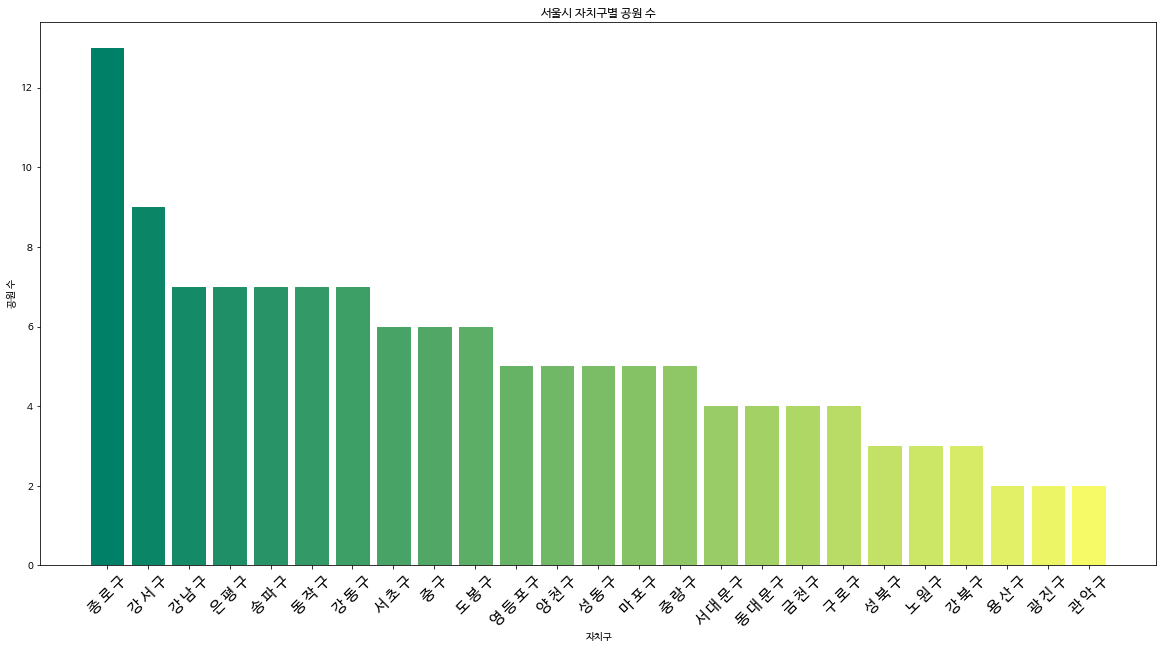

In [ ]:
parksg_gu=(park_info.groupby(park_info['공원주소']).count())[["공원명"]].sort_values(by='공원명', ascending=False)
parksg_gu = parksg_gu.rename(columns={'공원명': '공원 수', '공원주소':'자치구'})

# 그라데이션 색상을 위한 컬러 맵 생성
cmap = plt.get_cmap('summer')

fig, ax = plt.subplots(figsize = (20, 10))
bars_park = ax.bar(parksg_gu.index, parksg_gu['공원 수'], align='center')

plt.title("서울시 자치구별 공원 수")
plt.xlabel("자치구")
plt.ylabel("공원 수")
plt.xticks(rotation = 45, fontsize = 15)

# 그라데이션 색상 적용
for i, bar in enumerate(bars_park):
    bar.set_color(cmap(i / len(parksg_gu)))

# 그래프 출력
plt.show()

# 반려동물 유무 비율

In [ ]:
# 반려동물 유무 비율 보유 파일 불러오기
# 구분별(서울시) 2021년 기준 반려동물 여부

# CSV 파일 읽어오기
df = pd.read_csv('data/반려동물+유무+및+취득+경로_20230314161547.csv')

# 특정열에 특정값을 가진 행 추출하기
df2 = df[df['구분별(1)'].str.contains("지역소분류")]

# 추출된 데이터를 새로운 CSV 파일로 저장하기
df2.to_csv('반려동물 유무.csv', index=False)
df2

,구분별(1),구분별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8
36,지역소분류,종로구,25.9,74.1,16.9,35.5,33.6,1.2,11.2,1.1,0.5
37,지역소분류,중구,15.9,84.1,31.5,19.6,43.7,1.0,4.2,-,-
38,지역소분류,용산구,17.9,82.1,25.2,15.6,24.6,2.9,26.3,5.4,-
39,지역소분류,성동구,16.3,83.7,28.3,20.3,35.9,2.3,11.9,1.4,-
40,지역소분류,광진구,21.1,78.9,15.9,14.1,47.8,0.8,17.8,3.6,-
41,지역소분류,동대문구,20.3,79.7,24.2,13.5,35.1,2.0,18.4,6.8,-
42,지역소분류,중랑구,22.6,77.4,25.2,10.6,37.8,1.6,21.5,3.2,-
43,지역소분류,성북구,18.5,81.5,25.6,15.4,42.6,0.9,6.7,8.9,-
44,지역소분류,강북구,21.5,78.5,24.2,17.3,42.9,0.8,12.7,2.1,-
45,지역소분류,도봉구,15.0,85.0,27.6,15.8,42.5,1.8,9.1,3.2,-


In [ ]:
df2.columns

Index(['구분별(1)', '구분별(2)', '2021', '2021.1', '2021.2', '2021.3', '2021.4',
       '2021.5', '2021.6', '2021.7', '2021.8'],
      dtype='object')

In [ ]:
dict1 = dict(zip(df2['구분별(2)'], df2['2021']))
print(dict1)

{'종로구': '25.9', '중구': '15.9', '용산구': '17.9', '성동구': '16.3', '광진구': '21.1', '동대문구': '20.3', '중랑구': '22.6', '성북구': '18.5', '강북구': '21.5', '도봉구': '15.0', '노원구': '18.6', '은평구': '16.3', '서대문구': '20.6', '마포구': '17.4', '양천구': '17.8', '강서구': '16.5', '구로구': '21.7', '금천구': '12.9', '영등포구': '20.2', '동작구': '17.5', '관악구': '14.7', '서초구': '22.2', '강남구': '33.7', '송파구': '23.0', '강동구': '18.7'}


In [ ]:
import copy

dict2 = copy.deepcopy(dict1)
dict2

{'종로구': '25.9',
 '중구': '15.9',
 '용산구': '17.9',
 '성동구': '16.3',
 '광진구': '21.1',
 '동대문구': '20.3',
 '중랑구': '22.6',
 '성북구': '18.5',
 '강북구': '21.5',
 '도봉구': '15.0',
 '노원구': '18.6',
 '은평구': '16.3',
 '서대문구': '20.6',
 '마포구': '17.4',
 '양천구': '17.8',
 '강서구': '16.5',
 '구로구': '21.7',
 '금천구': '12.9',
 '영등포구': '20.2',
 '동작구': '17.5',
 '관악구': '14.7',
 '서초구': '22.2',
 '강남구': '33.7',
 '송파구': '23.0',
 '강동구': '18.7'}

In [ ]:
sorted_items = sorted(dict2.items(), key=lambda x: x[1], reverse=True)
sorted_dict2 = dict(sorted_items)
print(sorted_dict2)

{'강남구': '33.7', '종로구': '25.9', '송파구': '23.0', '중랑구': '22.6', '서초구': '22.2', '구로구': '21.7', '강북구': '21.5', '광진구': '21.1', '서대문구': '20.6', '동대문구': '20.3', '영등포구': '20.2', '강동구': '18.7', '노원구': '18.6', '성북구': '18.5', '용산구': '17.9', '양천구': '17.8', '동작구': '17.5', '마포구': '17.4', '강서구': '16.5', '성동구': '16.3', '은평구': '16.3', '중구': '15.9', '도봉구': '15.0', '관악구': '14.7', '금천구': '12.9'}


In [ ]:
df_gu = pd.DataFrame(sorted_dict2.items(), columns=['gu', 'data'])
df_gu['data'] = df_gu['data'].astype('float')
df_gu.sort_values('data', inplace=True, ascending=False)

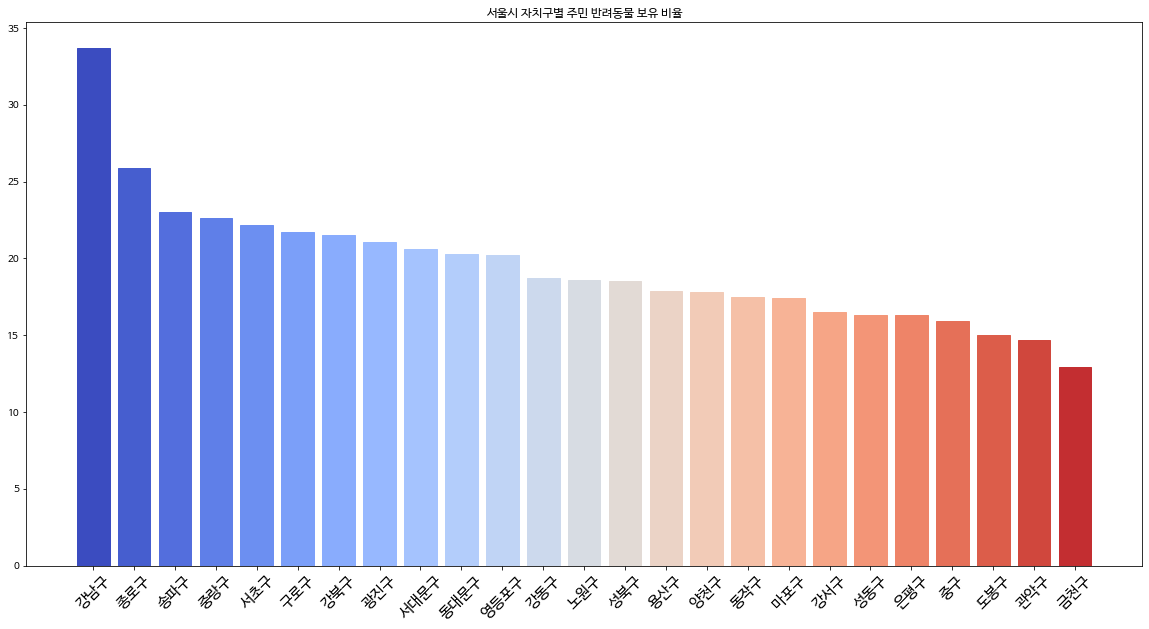

In [ ]:
import matplotlib.pyplot as plt


# 그라데이션 색상을 위한 컬러 맵 생성
cmap = plt.get_cmap('coolwarm')
# 데이터프레임에서 값을 가져와서 바차트를 그립니다.
fig, ax = plt.subplots(figsize = (20, 10))
# bars = ax.bar(list(sorted_dict2.keys())[::-1], list(sorted_dict2.values())[::-1], align='center')
bars = ax.bar(df_gu.gu, df_gu.data, align='center')
# 그라데이션 색상 적용
for i, bar in enumerate(bars):
    bar.set_color(cmap(i / len(list(sorted_dict2.keys()))))
# x축 레이블 설정
plt.xticks(rotation = 45, fontsize = 15)
# 그래프 타이틀 설정
plt.title('서울시 자치구별 주민 반려동물 보유 비율')
# 그래프 출력
plt.show()